# Capstone Project
**Numpy, Pandas, Matplotlib and Seaborn**

### Overview
If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal
The goal of this project is to explore the data based off the FiveThirtyEight article, [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/), and see if we reach a similar conclusion. We will need to use our pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.

---

## Part One: Understanding the Background and Data

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

## Part Two: Exploring Fandango displayed scores versus true user Ratings
sLet't first uxplore the Fandango ratings to see if our analysis agrees with the article's conclusion.

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Fandango data

In [3]:
fandango = pd.read_csv("fandango_scrape.csv")

In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [7]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### Ratings

Let's explore the relationship between popularity of a film and its rating by creating a scatterplot that shows the relationship between rating and number of votes.

In [15]:
plt.grid?

In [20]:
plt.legend?

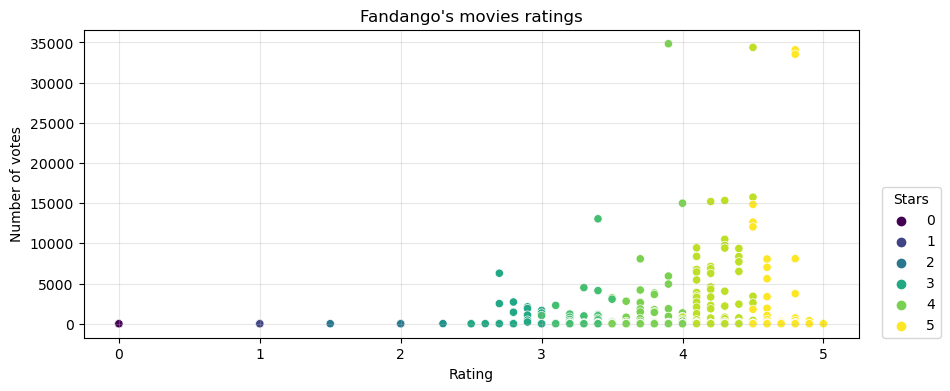

In [26]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=fandango, x='RATING', y='VOTES',
                hue='STARS', palette='viridis')

plt.xlabel('Rating')
plt.ylabel('Number of votes')
plt.title("Fandango's movies ratings")
plt.grid(True, alpha=0.3)
plt.legend(loc=(1.03, 0), title='Stars');

We can notice that there is a correlation between all the variables. Let's check the numbers.

In [12]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


### Years

Assuming that every row in the FILM title column has the same format:

    Film Title Name (Year)
    
Let's create a new column that is able to strip the year from the title strings and set this new column as YEAR.

In [28]:
fandango['YEAR'] = fandango['FILM'].apply(lambda x: int(x[-5:-1]))
fandango['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: int64

Let's check many movies are in the Fandango DataFrame per year.

In [34]:
fandango['YEAR'].value_counts().sort_index(ascending=False)

2016      1
2015    478
2014     23
2012      1
1964      1
Name: YEAR, dtype: int64

Text(0, 0.5, 'Movie count')

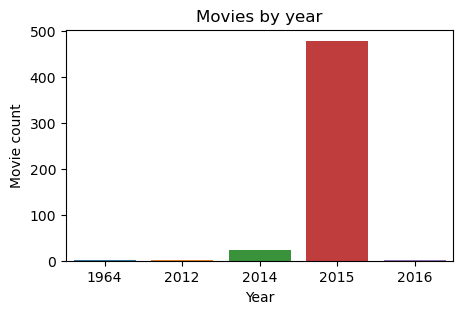

In [49]:
plt.figure(figsize=(5,3))
sns.countplot(data=fandango, x='YEAR');

plt.title('Movies by year')
plt.xlabel('Year')
plt.ylabel('Movie count')

The article we are using as a base was published in 2015, so it makes sense to see so many "recent" movies. But what about the 2016 one?

In [39]:
fandango[fandango['YEAR']==2016]

,FILM,STARS,RATING,VOTES,YEAR
286,Deadpool (2016),5.0,4.7,11,2016


Let's keep it in the dataset for now (emulating what is being done in the course).

### Votes

Let's check what are the 10 movies with the highest number of votes.

In [40]:
fandango.sort_values('VOTES', ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


Now, what about the movies with zero votes?

In [68]:
len(fandango[fandango['VOTES']==0])

69

We don't want to evaluate those movies, so let's create a DataFrame of only reviewed films by removing any films that have zero votes.

In [41]:
fan_reviewed = fandango[fandango['VOTES']>0].copy()  # != statement should also work
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


----

As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions with a KDE plot that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING).

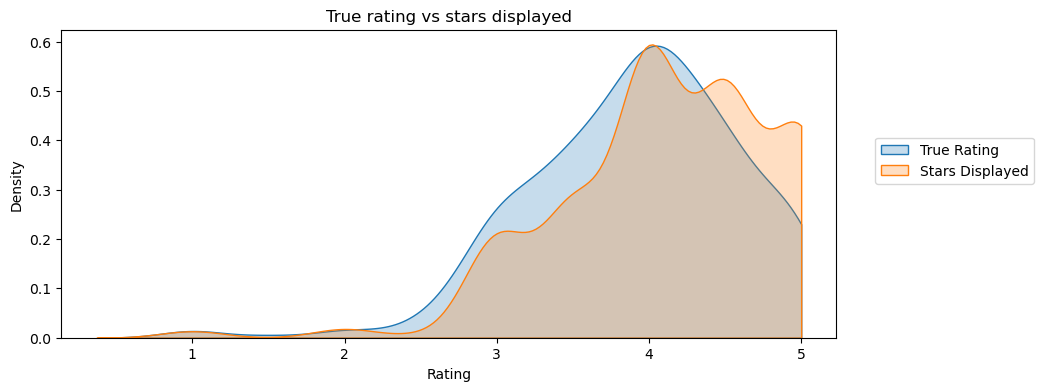

In [50]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=fan_reviewed, x='RATING',
            clip=[0,5], fill=True, label='True Rating')
sns.kdeplot(data=fan_reviewed, x='STARS',
            clip=[0,5], fill=True, label='Stars Displayed')

plt.title('True rating vs stars displayed')
plt.xlabel('Rating')
plt.legend(loc=(1.05, 0.5));

Looking at the 5 stars rated movies, we can notice that some of them were rounded up. Let's now actually quantify this discrepancy by creating a new column of the different between STARS displayed versus true RATING.

In [43]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(1)
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


In [55]:
fan_reviewed['STARS_DIFF'].value_counts()

0.0    107
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: STARS_DIFF, dtype: int64

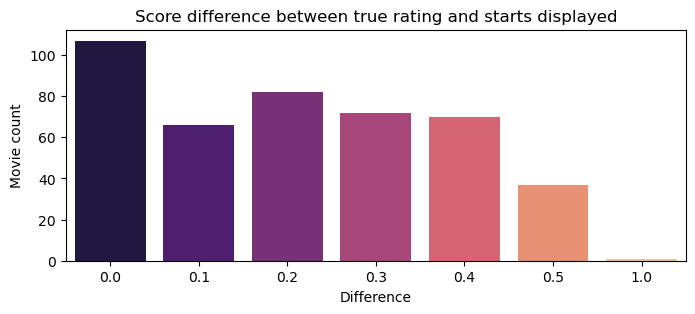

In [52]:
plt.figure(figsize=(8,3))
sns.countplot(data=fan_reviewed, x='STARS_DIFF',
              palette='magma')

plt.title('Score difference between true rating and starts displayed');
plt.xlabel('Difference')
plt.ylabel('Movie count');

We can see that one movie was displaying over a 1 star difference than its true rating! What movie was this?

In [56]:
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


If we wanna do a little extra work, we can check what is the percentage of the stars difference over all the reviewed movies.

**New method and attribute learned ``get_height`` and ``containers`` :)**

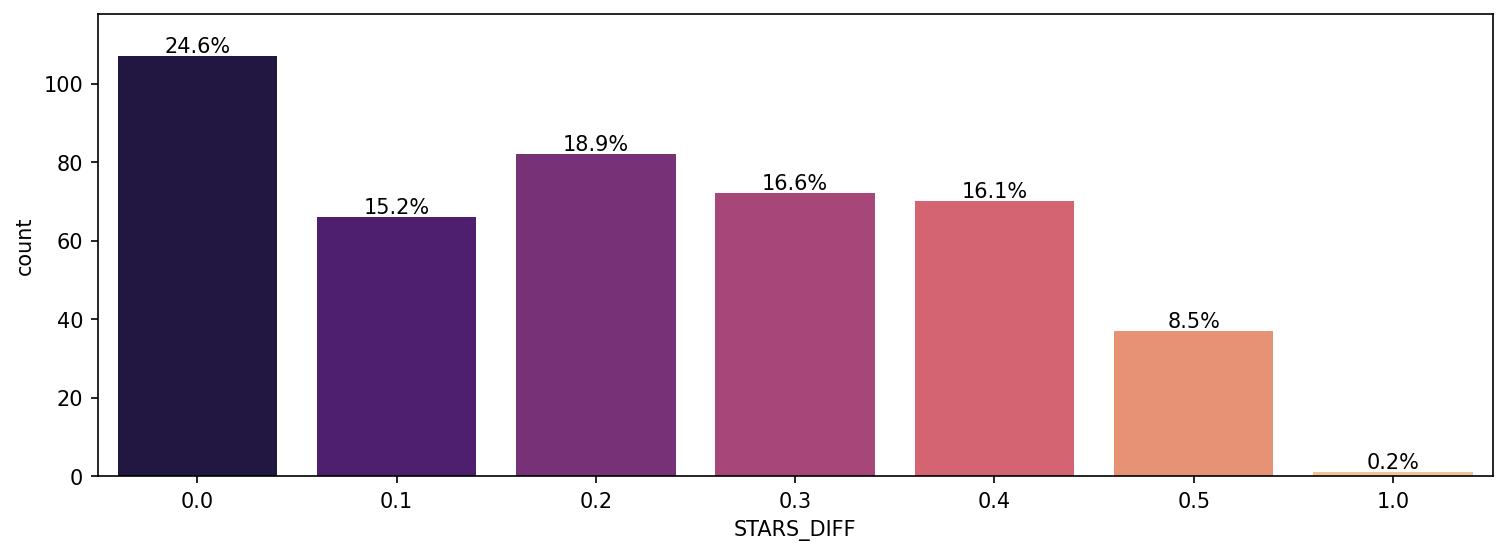

In [57]:
fig = plt.figure(figsize=(12,4), dpi=150)
axs = sns.countplot(data=fan_reviewed, x='STARS_DIFF',
                    palette='magma')

# getting the total count of the 'VOTES' column
total = fan_reviewed['VOTES'].count()

# annotate the bars with fmt from matplotlib
for container in axs.containers:
    labels = [f'{(v.get_height() / total) * 100:.1f}%' for v in container]
    axs.bar_label(container, labels=labels)

# add space at the end of the bar for the labels
axs.margins(y=0.1)

How does the review count affects the stars to rating difference?

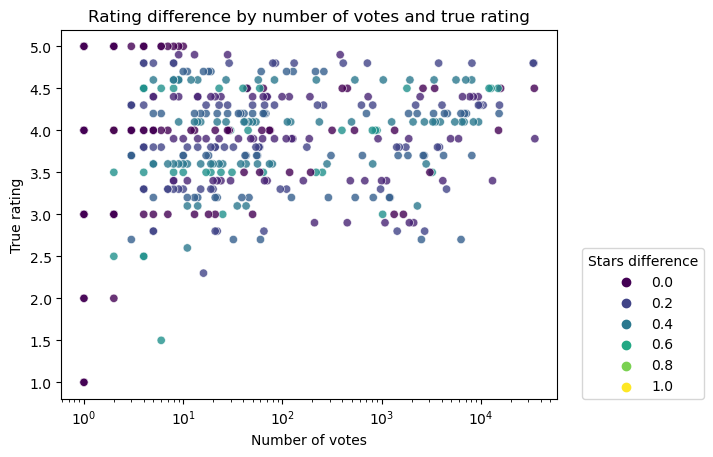

In [60]:
plt.figure()
sns.scatterplot(data=fan_reviewed, x='VOTES', y='RATING',
                hue='STARS_DIFF', palette='viridis',
                alpha=0.8)

plt.title('Rating difference by number of votes and true rating')
plt.xlabel('Number of votes')
plt.ylabel('True rating')
plt.xscale('log')
plt.legend(loc=(1.05, 0), title='Stars difference');

It seems that there is not much impact of the number of votes on the stars difference. It has more to do with the distance between the true rating and the stars displayed.

## Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

### All sites scores data

In [61]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [62]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [63]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [64]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. Let's create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.

(0.0, 100.0)

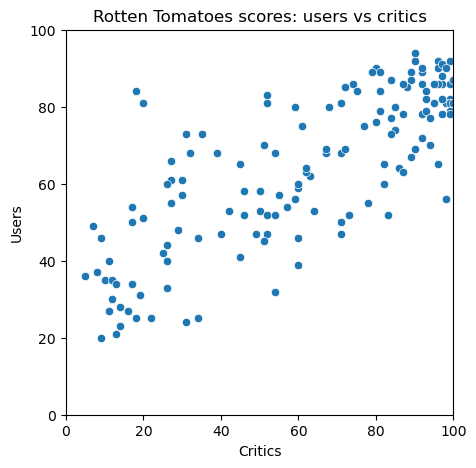

In [79]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')

plt.title('Rotten Tomatoes scores: users vs critics')
plt.xlabel('Critics')
plt.ylabel('Users')
plt.xlim(0, 100)
plt.ylim(0, 100)

Let's quantify this difference by comparing the critics ratings and the RT User ratings by creating a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes.

We will calculate this with ```RottenTomatoes - RottenTomatoes_User```, so that: values closer to 0 means aggrement between Critics and Users; larger positive values means critics rated much higher than users; and larger negative values means users rated much higher than critics.

In [67]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites['Rotten_Diff'] = all_sites['Rotten_Diff'].round(0)
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

In [68]:
np.mean(abs(all_sites['Rotten_Diff']))

15.095890410958905

Let's plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot.

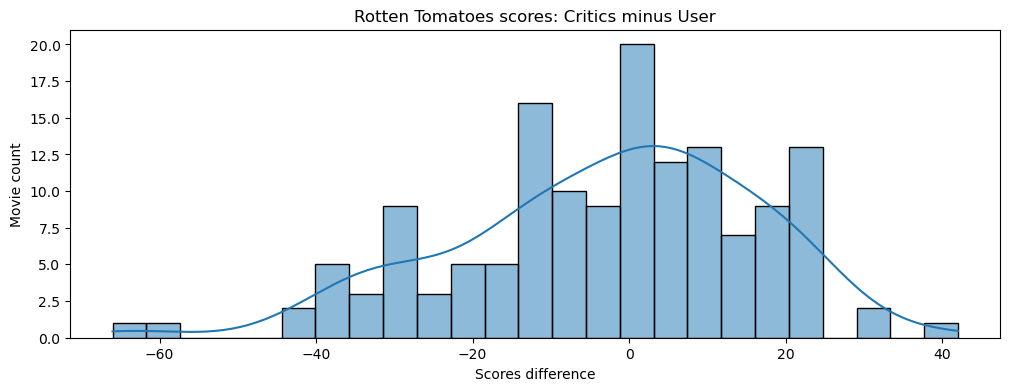

In [69]:
plt.figure(figsize=(12,4))
sns.histplot(data=all_sites, x='Rotten_Diff',
            bins=25, kde=True)

plt.title('Rotten Tomatoes scores: Critics minus User')
plt.xlabel('Scores difference')
plt.ylabel('Movie count');

Let's create a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.

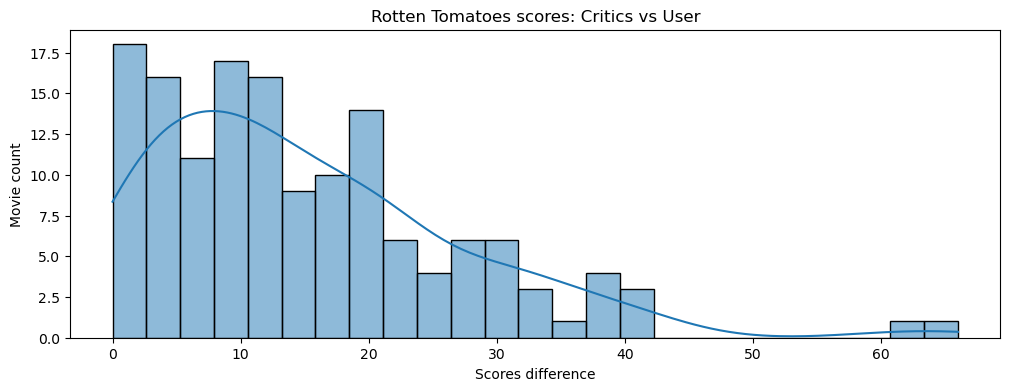

In [70]:
plt.figure(figsize=(12,4))
sns.histplot(x=abs(all_sites['Rotten_Diff']),
            bins=25, kde=True)

plt.title('Rotten Tomatoes scores: Critics vs User')
plt.xlabel('Scores difference')
plt.ylabel('Movie count');

Let's find out which movies are causing the largest differences by checking the top 5 movies with the largest *negative* difference. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.

**Users love but critics hate**

In [266]:
all_sites[['FILM', 'Rotten_Diff']].sort_values('Rotten_Diff')[0:5]

# or
# all_sites[['FILM', 'Rotten_Diff']].nsmallest(5, 'Rotten_Diff')

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


We can also check the top 5 movies with the largest *positive* difference.

**Critics love but users hate**

In [71]:
all_sites[['FILM', 'Rotten_Diff']].sort_values('Rotten_Diff', ascending=False)[0:5]

# or
# all_sites[['FILM', 'Rotten_Diff']].nlargest(5, 'Rotten_Diff')

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


### MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

(0.0, 10.0)

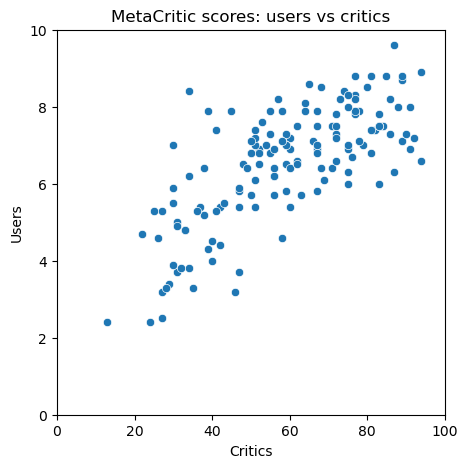

In [80]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')

plt.title('MetaCritic scores: users vs critics')
plt.xlabel('Critics')
plt.ylabel('Users')
plt.xlim(0, 100)
plt.ylim(0, 10)

## IMDB

Finally let's explore IMDB. 

Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies by creating a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.

In [248]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
 8   Rotten_Diff                 146 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.4+ KB


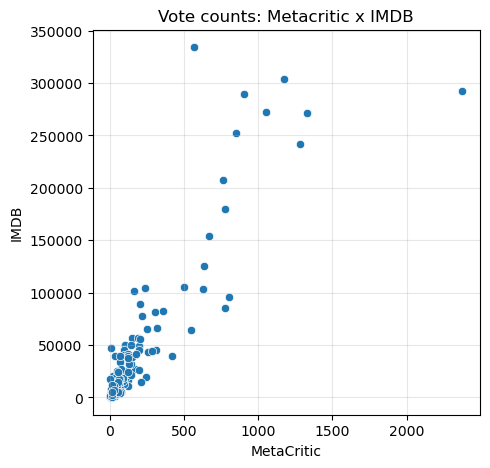

In [86]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

plt.title('Vote counts: Metacritic x IMDB')
plt.xlabel('MetaCritic')
plt.ylabel('IMDB')
plt.grid(True, alpha=0.3);

**Highest IMDB vote count**

The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What movie is this?

In [87]:
all_sites.sort_values('IMDB_user_vote_count', ascending=False)[0:1]

# or
# all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Highest MetaCritic vote count**

In [88]:
all_sites.sort_values('Metacritic_user_vote_count', ascending=False)[0:1]

# or
# all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

Let's combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so we will do an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [89]:
df = pd.merge(fandango, all_sites, how='inner', on='FILM')
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    int64  
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(8), object(1)


In [91]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT, Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

In [92]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff'],
      dtype='object')

In [94]:
df['RT_Norm'] = (df['RottenTomatoes']/20).round(1)
df['RTU_Norm'] = (df['RottenTomatoes_User']/20).round(1)
df['Meta_Norm'] = (df['Metacritic']/20).round(1)
df['MetaU_Norm'] = (df['Metacritic_User']/2).round(1)
df['IMDB_Norm'] = (df['IMDB']/2).round(1)
df.iloc[:, 13:].describe()

,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,3.033103,3.180690,2.942759,3.253793,3.369655
std,1.509095,0.996542,0.977365,0.763128,0.477744
min,0.200000,1.000000,0.600000,1.200000,2.000000
25%,1.600000,2.500000,2.200000,2.800000,3.200000
50%,3.200000,3.300000,3.000000,3.400000,3.400000
75%,4.400000,4.000000,3.800000,3.800000,3.700000
max,5.000000,4.700000,4.700000,4.800000,4.300000


In [95]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


Now, let's create a norm_scores DataFrame that only contains the normalizes ratings.

In [104]:
norm_scores = df[['FILM', 'STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm', 'IMDB_Norm']]
norm_scores.columns = ['Film', 'Fandango stars displayed', 'Fandango true rating',
                       'Rotten Tomatoes critics', 'Rotten Tomatoes users',
                       'MetaCritic critics', 'MetaCritic users',
                       'IMDB users']
norm_scores.head()

,Film,Fandango stars displayed,Fandango true rating,Rotten Tomatoes critics,Rotten Tomatoes users,MetaCritic critics,MetaCritic users,IMDB users
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


Let's create a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but we will focus on the Seaborn KDEplot to quickly show this.

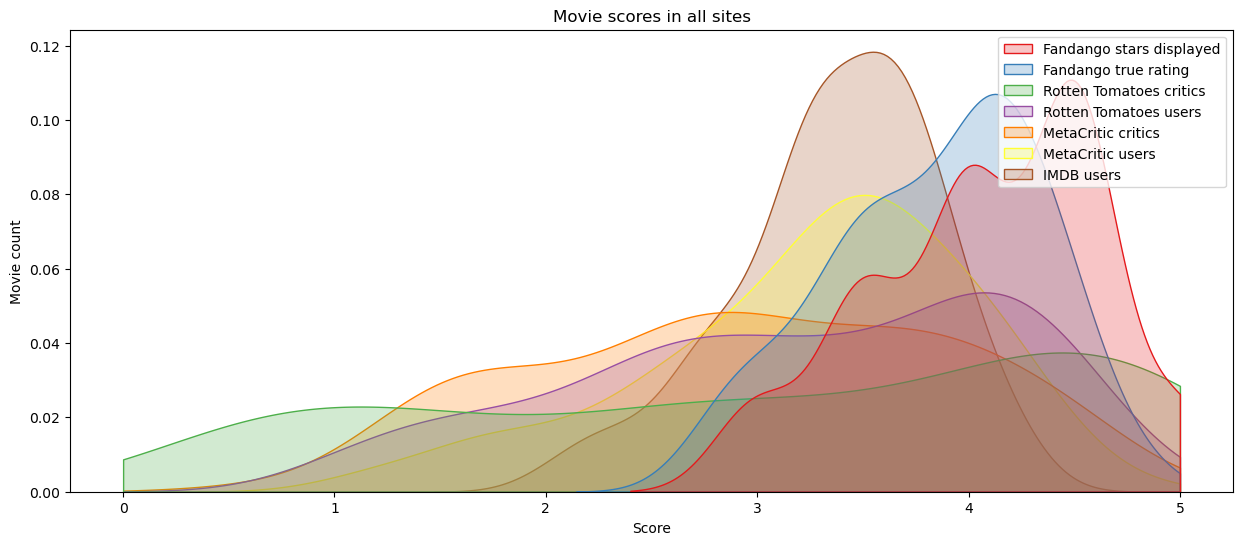

In [105]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=norm_scores, clip=[0,5],
            shade=True, palette='Set1')

plt.title('Movie scores in all sites')
plt.xlabel('Score')
plt.ylabel('Movie count');

Quick Note: if you have issues moving the legend for a seaborn kdeplot, check this [link](https://github.com/mwaskom/seaborn/issues/2280).

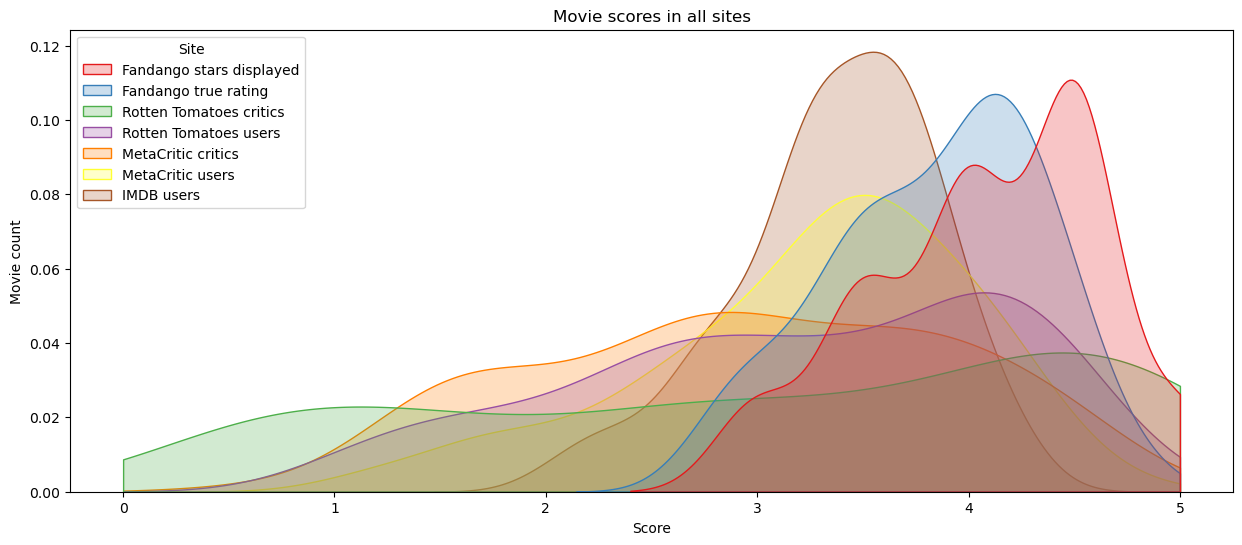

In [111]:
fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(data=norm_scores, clip=[0,5],
            shade=True, palette='Set1')

plt.title('Movie scores in all sites')
plt.xlabel('Score')
plt.ylabel('Movie count')

# moving the legend

def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title='Site', **kws)

move_legend(ax, "upper left")

Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.

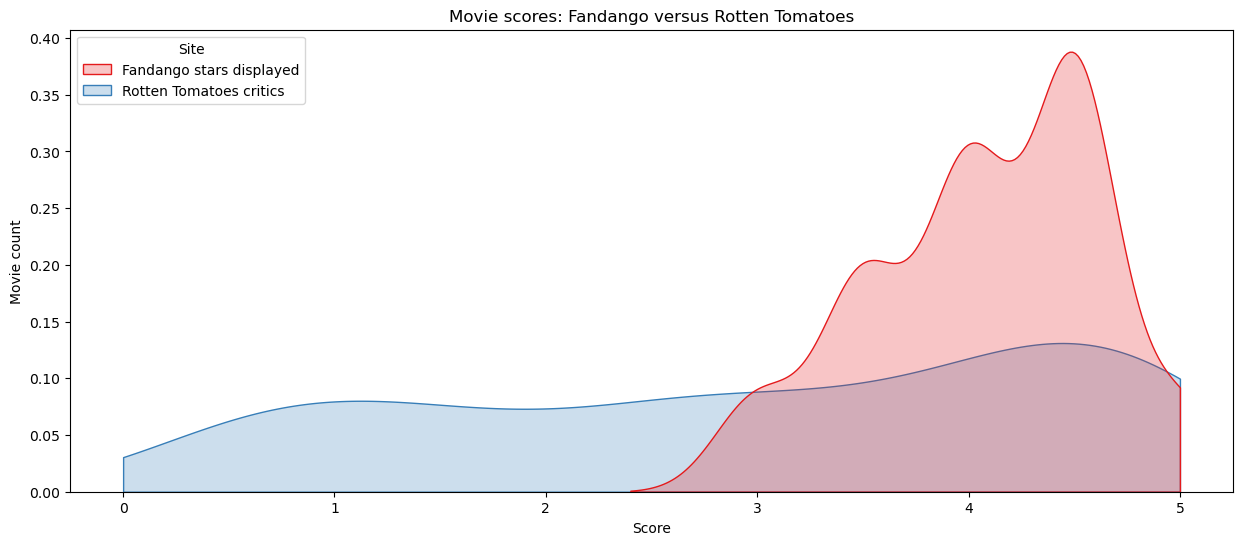

In [110]:
fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(data=norm_scores[['Fandango stars displayed', 'Rotten Tomatoes critics']], clip=[0,5],
            shade=True, palette='Set1')
plt.title('Movie scores: Fandango versus Rotten Tomatoes')
plt.xlabel('Score')
plt.ylabel('Movie count');
move_legend(ax, "upper left")

**OPTIONAL TASK: Create a histplot comparing all normalized scores.**

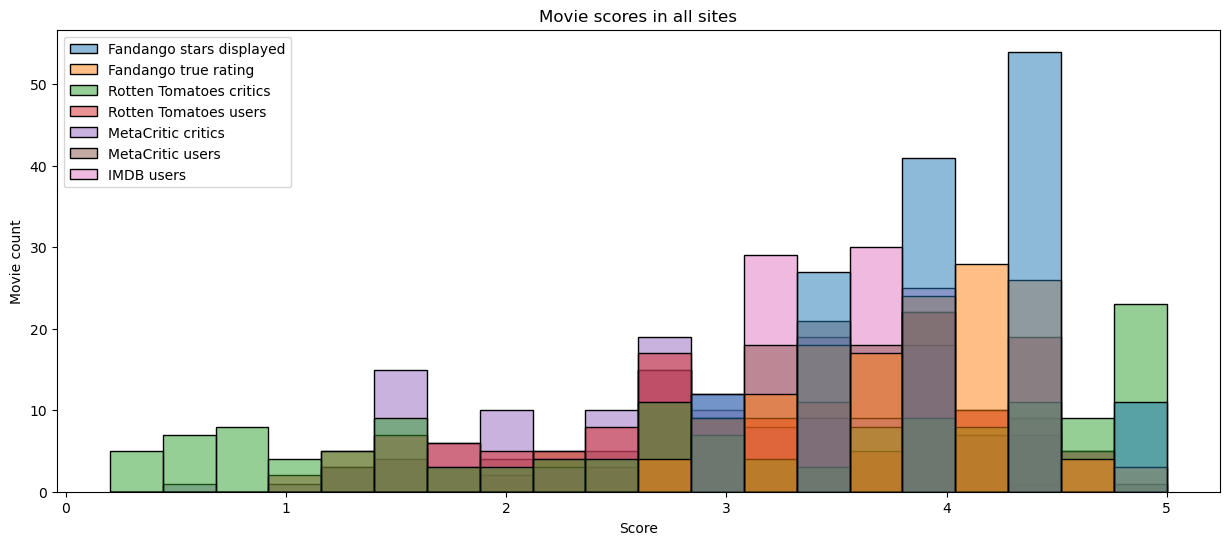

In [113]:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(data=norm_scores, bins=20)

plt.title('Movie scores in all sites')
plt.xlabel('Score')
plt.ylabel('Movie count');


### How are the worst movies rated across all platforms?

Let's create a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies.

In [126]:
norm_scores = norm_scores.drop('Film', axis=1)
norm_scores

,Fandango stars displayed,Fandango true rating,Rotten Tomatoes critics,Rotten Tomatoes users,MetaCritic critics,MetaCritic users,IMDB users
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


<Figure size 640x480 with 0 Axes>

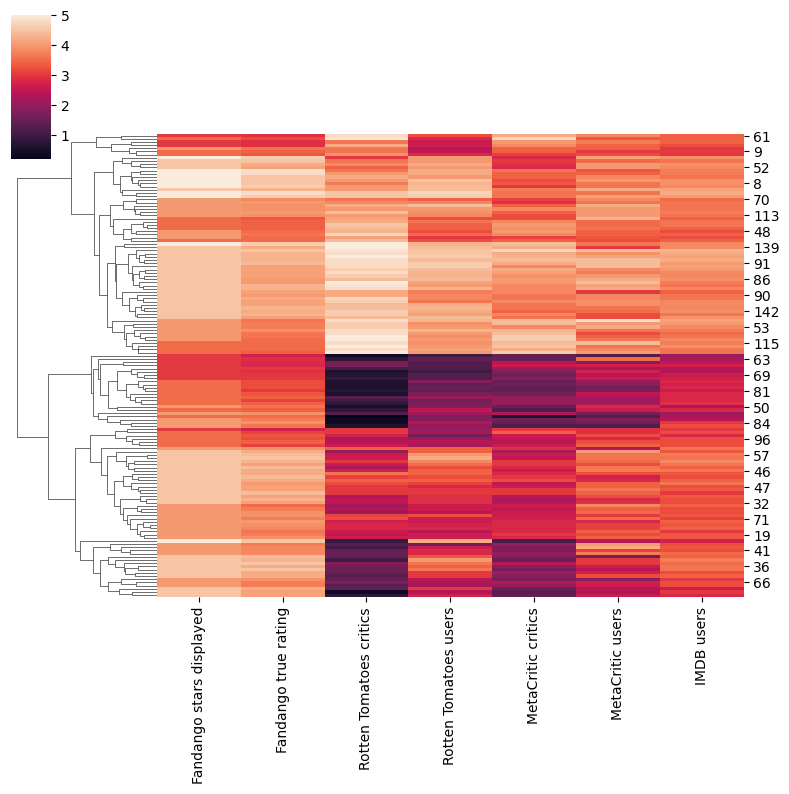

In [116]:
plt.figure()
sns.clustermap(data=norm_scores, col_cluster=False,
               figsize=(8,8))

By looking at the lower half part, we can notice how movies that are badly rated on other platforms have good ratings in Fandango.

Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating.

Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? 

In [128]:
# adding the movie name column back
norm_scores['Film'] = df['FILM']
norm_scores

,Fandango stars displayed,Fandango true rating,Rotten Tomatoes critics,Rotten Tomatoes users,MetaCritic critics,MetaCritic users,IMDB users,Film
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)
...,...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4,"Kumiko, The Treasure Hunter (2015)"
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5,The Diary of a Teenage Girl (2015)
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9,The Wrecking Crew (2015)
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7,Tangerine (2015)


In [129]:
worst_rated = norm_scores.nsmallest(10, 'Rotten Tomatoes critics')
worst_rated

,Fandango stars displayed,Fandango true rating,Rotten Tomatoes critics,Rotten Tomatoes users,MetaCritic critics,MetaCritic users,IMDB users,Film
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


Now, let's visualize the distribution of ratings across all sites for the top 10 worst movies.

Text(0.5, 1.0, "Ratings for RT Critic's 10 Worst Reviewed Films")

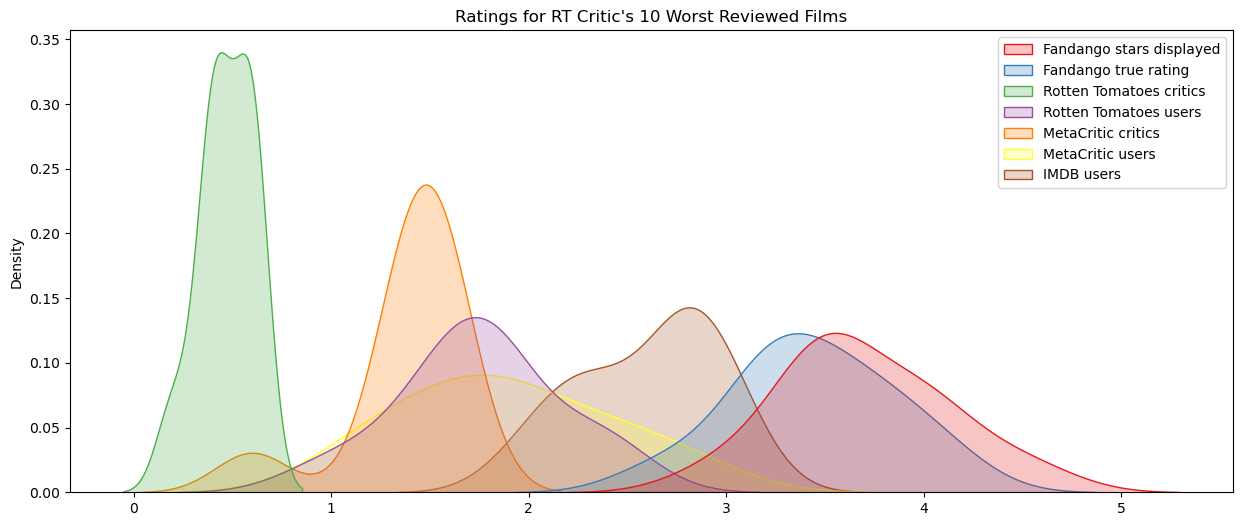

In [130]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=worst_rated,
            shade=True, palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films")

Let's take a closer look in the top 1 worst rated movie by RT:

In [133]:
worst_rated.iloc[1]

Fandango stars displayed               4.5
Fandango true rating                   4.1
Rotten Tomatoes critics                0.4
Rotten Tomatoes users                  2.3
MetaCritic critics                     1.3
MetaCritic users                       2.3
IMDB users                             3.0
Film                        Taken 3 (2015)
Name: 25, dtype: object

In [131]:
worst_rated.columns

Index(['Fandango stars displayed', 'Fandango true rating',
       'Rotten Tomatoes critics', 'Rotten Tomatoes users',
       'MetaCritic critics', 'MetaCritic users', 'IMDB users', 'Film'],
      dtype='object')

In [132]:
worst_rated.iloc[1][['Rotten Tomatoes critics', 'Rotten Tomatoes users',
       'MetaCritic critics', 'MetaCritic users', 'IMDB users']].mean()

1.86

---

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts**: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!

----